## Informasi Mahasiswa

Nama: Devi Anggraini

NPM : 210810701008

## Jenis Dataset


Dataset yang digunakan pada tugas kali ini adalah dataset Medical Cost Personal Datasets yang di ambil dari situs kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance). Dataset ini berisi informasi tentang biaya medis individu, termasuk atribut seperti usia, jenis kelamin, indeks massa tubuh (BMI), jumlah anak yang ditanggung oleh asuransi kesehatan, apakah perokok atau tidak, dan wilayah tempat tinggal di Amerika Serikat.

Informasi Atribut:
Atribut input dan output adalah sebagai berikut:

- Usia (age): Usia penerima utama asuransi.
- Jenis Kelamin (sex): Jenis kelamin kontraktor asuransi, perempuan atau laki-laki.
- Indeks Massa Tubuh (BMI): Indeks massa tubuh, memberikan pemahaman tentang berat badan yang relatif tinggi atau rendah terhadap tinggi badan, merupakan indeks objektif berat badan (kg / m ^ 2) menggunakan rasio tinggi terhadap berat badan, idealnya 18.5 hingga 24.9.
- Jumlah Anak (children): Jumlah anak yang ditanggung oleh asuransi kesehatan atau jumlah tanggungan.
- Perokok (smoker): Status merokok, apakah perokok atau tidak.
- Wilayah (region): Wilayah tempat tinggal penerima asuransi di Amerika Serikat, termasuk northeast, southeast, southwest, northwest.
- Biaya Medis (charges): Biaya medis individu yang ditagih oleh asuransi kesehatan.

Menggunakan data ini untuk mengetahui pengaruh riwayat seseorang dengan Biaya Medis

## Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca dataset
data_df = pd.read_csv("insurance.csv")
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing

In [3]:
# informasi umum kolom pada dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Checking Duplicates
data_duplicates_rows=data_df[data_df.duplicated()]
data_duplicates_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [5]:
#Removing Duplicates in any
data_df=data_df.drop_duplicates()
data_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Membaca file CSV
data_df = pd.read_csv('insurance.csv')

# Ubah tipe data pada atribut sex: female menjadi 0 dan male menjadi 1
data_df['sex'] = data_df['sex'].map({'female': 0, 'male': 1})

# Ubah tipe data pada atribut smoker: yes menjadi 1 dan no menjadi 0
data_df['smoker'] = data_df['smoker'].map({'yes': 1, 'no': 0})

# Ubah tipe data pada atribut region: US = 1, northeast = 2, southeast = 3, southwest = 4, northwest = 5
data_df['region'] = data_df['region'].map({'US': 1, 'northeast': 2, 'southeast': 3, 'southwest': 4, 'northwest': 5})

# Hapus kolom dengan tipe data objek
data_df_numeric = data_df.select_dtypes(include=['int64', 'float64'])

In [7]:
# informasi umum kolom pada dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [8]:
# informasi statistik dari dataset
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,3.486547,1.104915,2.0000,3.00000,3.000,4.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
# cek apakah ada missing value pada dataset
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Menghapus kolom 'bmi' dan 'sex'
data_df.drop(['bmi'], axis=1, inplace=True)

# Menampilkan 5 baris pertama dari data setelah penghapusan kedua kolom
print(data_df.head())

   age  sex  children  smoker  region      charges
0   19    0         0       1       4  16884.92400
1   18    1         1       0       3   1725.55230
2   28    1         3       0       3   4449.46200
3   33    1         0       0       5  21984.47061
4   32    1         0       0       5   3866.85520


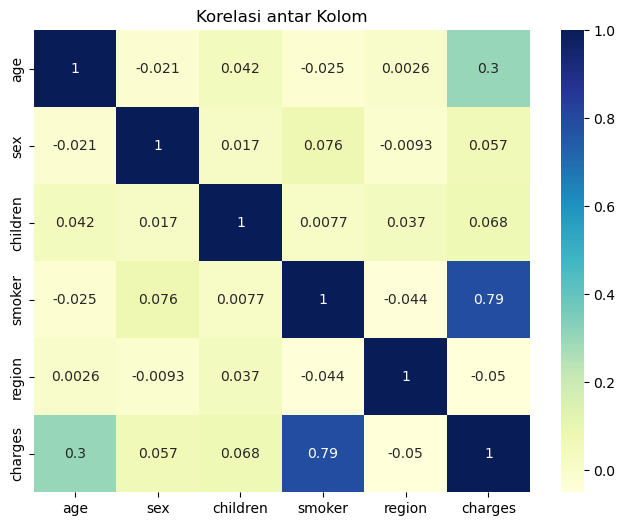

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
df_cor = data_df.corr()

# Plot heatmap korelasi dengan skema warna YlGnBu
plt.figure(figsize=(8, 6))
sns.heatmap(df_cor, annot=True, cmap='YlGnBu')
plt.title('Korelasi antar Kolom')
plt.show()


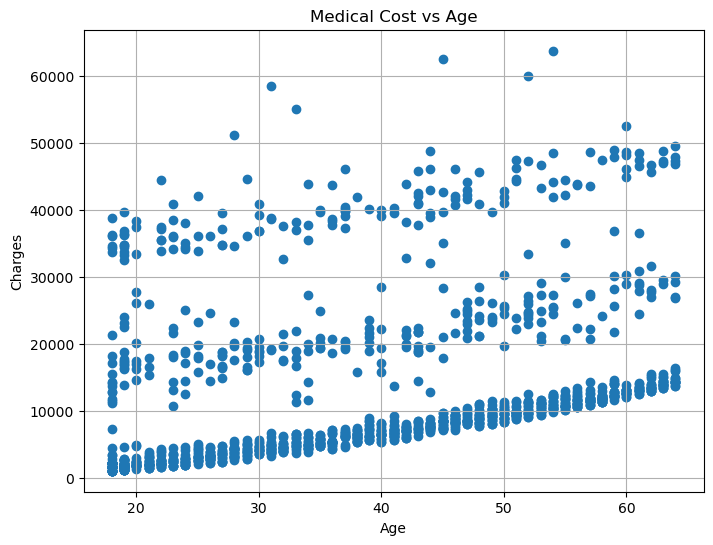

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(data_df['age'], data_df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Medical Cost vs Age')
plt.grid(True)
plt.show()

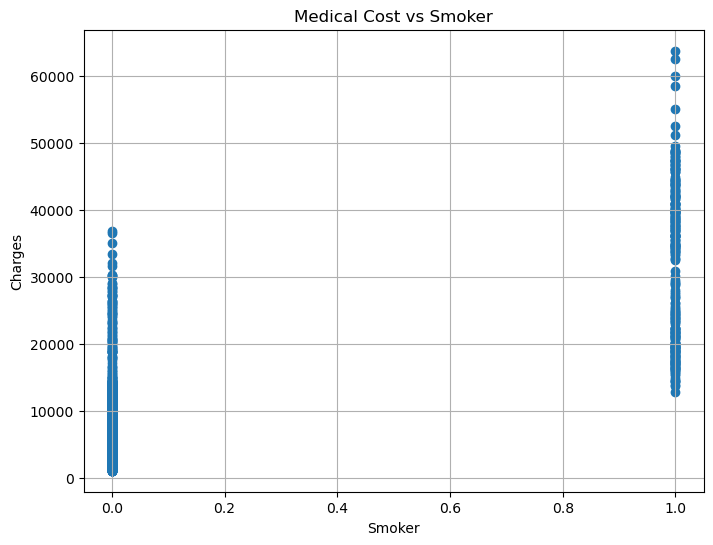

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(data_df['smoker'], data_df['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Medical Cost vs Smoker')
plt.grid(True)
plt.show()

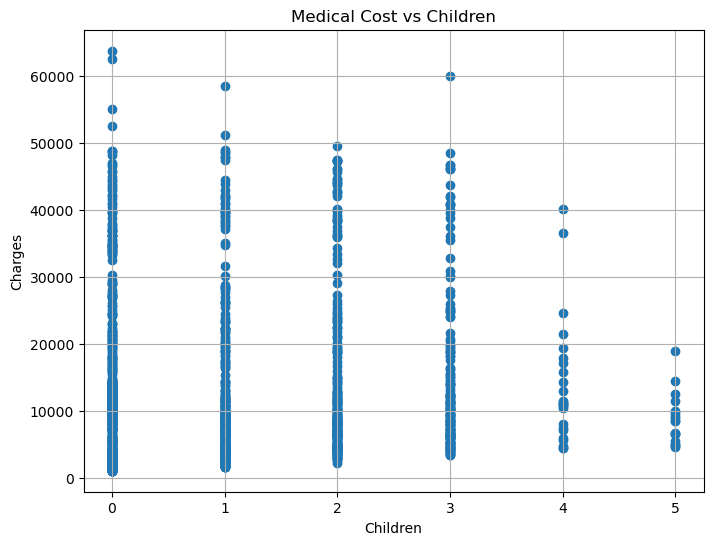

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(data_df['children'], data_df['charges'])
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Medical Cost vs Children')
plt.grid(True)
plt.show()

### Split Dataset

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Inisialisasi Scaler
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = data_df.drop('charges', axis=1)
y = data_df['charges']

# Skala data variabel independen
X_scaled = scaler.fit_transform(X)

# Pembagian dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn import metrics

# Fungsi untuk menampilkan hasil evaluasi model
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

# Membangun Model SVM dan ANN

In [16]:
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras import layers

In [21]:
# Inisialisasi model SVM dan ANN
models = {
    "Support Vector Machine (Regresi)": SVR(kernel='linear'),
    "Artificial Neural Network": tf.keras.Sequential([
        layers.Dense(264, input_shape=(X_train.shape[1],)),
        layers.Dense(132, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
}

In [22]:
# Compile model ANN
models["Artificial Neural Network"].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model ANN
print("Ringkasan Model Artificial Neural Network:")
print(models["Artificial Neural Network"].summary())

Ringkasan Model Artificial Neural Network:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 264)            │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 132)            │        34,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,141 (176.33 KB)

 Trainable params: 45,141 (176.33 KB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
# Latih dan evaluasi setiap model
for name, model in models.items():
    print(f"Melatih {name}...")
    if name == "Artificial Neural Networks (ANN)":
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int)  # Konversi probabilitas ke prediksi biner
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(f"Hasil evaluasi untuk {name}:")
    print_evaluate(y_test, y_pred)
    print("\n")

Melatih Support Vector Machine (Regresi)...
Hasil evaluasi untuk Support Vector Machine (Regresi):
MAE: 8039.034086862273
MSE: 152487822.87840414
RMSE: 12348.595988143921
R2 Square 0.017783775666570634


Melatih Artificial Neural Network...
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -31292.6699
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Hasil evaluasi untuk Artificial Neural Network:
MAE: 12967.330701392048
MSE: 323400159.8541406
RMSE: 17983.33005464062
R2 Square -1.0831098376560795


